In [16]:
%run config.ipynb
import seaborn as sns

## Reading Datasets

In [9]:
# business = pd.read_json("data/yelp_academic_dataset_business.json", lines=True)
# check_in = pd.read_json("data/yelp_academic_dataset_checkin.json", lines=True)

# choose a version to read the review file (json file is the original one and the csv file is the 0.01 sampled version)
review = pd.read_csv("data/yelp_academic_dataset_sample_review.csv")
# review = pd.read_json("data/yelp_academic_dataset_review.json", lines=True)

# tip = pd.read_json("data/yelp_academic_dataset_tip.json", lines=True)
user = pd.read_json("data/yelp_academic_dataset_user.json", lines=True)

In [3]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80211 entries, 0 to 80210
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    80211 non-null  object
 1   user_id      80211 non-null  object
 2   business_id  80211 non-null  object
 3   stars        80211 non-null  int64 
 4   useful       80211 non-null  int64 
 5   funny        80211 non-null  int64 
 6   cool         80211 non-null  int64 
 7   text         80211 non-null  object
 8   date         80211 non-null  object
dtypes: int64(4), object(5)
memory usage: 5.5+ MB


In [5]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320761 entries, 0 to 1320760
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_id           1320761 non-null  object        
 1   business_id       1320761 non-null  object        
 2   text              1320761 non-null  object        
 3   date              1320761 non-null  datetime64[ns]
 4   compliment_count  1320761 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 50.4+ MB


In [6]:
check_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  175187 non-null  object
 1   date         175187 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [9]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


## Preprocessing

In [ ]:
## TODO: Steps for preprocessing need to be implemented

## Visualization

In [3]:
review_freq = review.groupby(['stars'], as_index=False).size()

[Text(0, 0.5, '# reviews'), Text(0.5, 1.0, '# reviews in each star')]

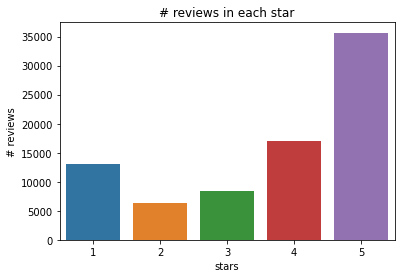

In [7]:
sns.barplot(x="stars", y="size", data=review_freq).set(ylabel="# reviews", title="# reviews in each star")

[Text(0.5, 1.0, '# reviews provided by the order of user popular')]

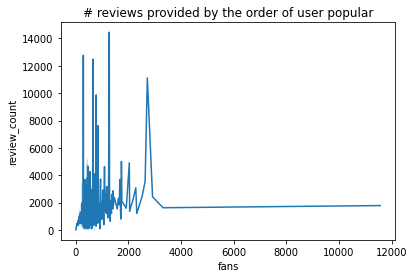

In [10]:
sns.lineplot(x="fans", y="review_count", data=user).set(title="# reviews provided by the order of user popular")

[Text(0.5, 1.0, '# reviews provided by the logarithm order of user popular')]

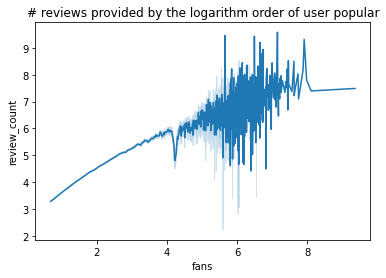

In [17]:
sns.lineplot(x="fans", y="review_count", data=np.log(user[["fans", "review_count"]])).set(title="# reviews provided by the logarithm order of user popular")

[Text(0, 0.5, '# useful votes'),
 Text(0.5, 1.0, 'comparison between # useful and # cool by given stars')]

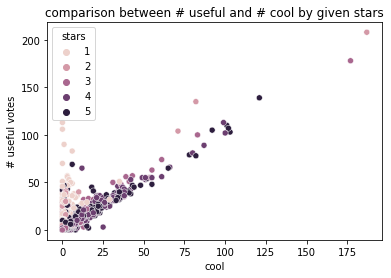

In [29]:
sns.scatterplot(x="cool", y="useful", hue="stars", data=review).set(ylabel="# useful votes", title="comparison between # useful and # cool by given stars")

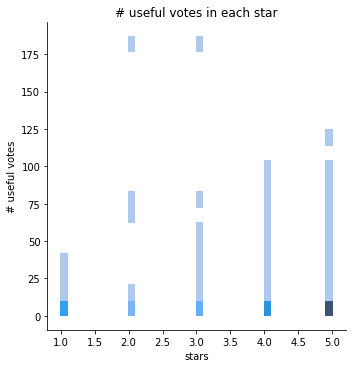

In [57]:
sns.displot(x="stars", y="cool", data=review).set(ylabel="# useful votes", title="# useful votes in each star")